In [1]:
from PIL import Image
import numpy as np
import os, shutil

In [2]:
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/Beauty_Detection_Model/588139_1060756_bundle_archive'

In [3]:
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'valid') 
test_dir = os.path.join(base_dir, 'test')

In [4]:
train_beautiful_dir = os.path.join(train_dir, 'beautiful')
train_average_dir = os.path.join(train_dir, 'average')
validation_beautiful_dir = os.path.join(validation_dir, 'beautiful')
validation_average_dir = os.path.join(validation_dir, 'average')
test_beautiful_dir = os.path.join(test_dir, 'beautiful')
test_average_dir = os.path.join(test_dir, 'average')

In [5]:
print('total training beautiful images:', len(os.listdir(train_beautiful_dir)))

print('total training average images:', len(os.listdir(train_average_dir)))

print('total validation beautiful images:', len(os.listdir(validation_beautiful_dir)))

print('total validation average images:', len(os.listdir(validation_average_dir)))

print('total test beautiful images:', len(os.listdir(test_beautiful_dir)))

print('total test average images:', len(os.listdir(test_average_dir)))

total training beautiful images: 2000
total training average images: 2000
total validation beautiful images: 150
total validation average images: 150
total test beautiful images: 150
total test average images: 150


# Building your network

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Compile Model

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing Using ImageGenerator¶

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


# Fitting the model using a batch generator

In [10]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 88s 876ms/step - loss: 0.6313 - acc: 0.6240 - val_loss: 0.4791 - val_acc: 0.7790
Epoch 2/30
100/100 [==============================] - 70s 697ms/step - loss: 0.5267 - acc: 0.7415 - val_loss: 0.3742 - val_acc: 0.8120
Epoch 3/30
100/100 [==============================] - 62s 616ms/step - loss: 0.4774 - acc: 0.7770 - val_loss: 0.5481 - val_acc: 0.8170
Epoch 4/30
100/100 [==============================] - 62s 622ms/step - loss: 0.4426 - acc: 0.8035 - val_loss: 0.3058 - val_acc: 0.7610
Epoch 5/30
100/100 [==============================] - 62s 624ms/step - loss: 0.4202 - acc: 0.8050 - val_loss: 0.3881 - val_acc: 0.7970
Epoch 6/30
100/100 [==============================] - 62s 624ms/step - loss: 0.4015 - acc: 0.8215 - val_loss: 0.5086 - val_acc: 0.8180
Epoch 7/30
100/100 [==============================] - 63s 630ms/step - loss: 0.3706 - acc: 0.8385 - val_loss: 0.3125 - val_acc: 0.8300
Epoch 8/30
100/100 [==============================] - 6

# Displaying curves of loss and accuracy during training

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Using data augmentation
Defining a new convnet that includes dropout


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 135s 1s/step - loss: 0.6620 - acc: 0.6022 - val_loss: 0.5295 - val_acc: 0.7133
Epoch 2/100
100/100 [==============================] - 107s 1s/step - loss: 0.5750 - acc: 0.6991 - val_loss: 0.6387 - val_acc: 0.7800
Epoch 3/100
100/100 [==============================] - 106s 1s/step - loss: 0.5304 - acc: 0.7431 - val_loss: 0.6593 - val_acc: 0.7933
Epoch 4/100
100/100 [==============================] - 112s 1s/step - loss: 0.4993 - acc: 0.7650 - val_loss: 0.6080 - val_acc: 0.7267
Epoch 5/100
100/100 [==============================] - 108s 1s/step - loss: 0.4905 - acc: 0.7713 - val_loss: 0.5286 - val_acc: 0.6600
Epoch 6/100
100/100 [==============================] - 113s 1s/step - loss: 0.4696 - acc: 0.7881 - val_loss: 0.2809 - val_acc: 0.7500
Epoch 7/100
100/100 [==============================] - 108s 1s/step - loss: 0.4491 - acc: 0.7959 - val_loss: 0.39

100/100 [==============================] - 125s 1s/step - loss: 0.1659 - acc: 0.9362 - val_loss: 0.0168 - val_acc: 0.9700
Epoch 62/100
100/100 [==============================] - 125s 1s/step - loss: 0.1548 - acc: 0.9444 - val_loss: 0.1121 - val_acc: 0.9667
Epoch 63/100
100/100 [==============================] - 124s 1s/step - loss: 0.1633 - acc: 0.9409 - val_loss: 0.1030 - val_acc: 0.9667
Epoch 64/100
100/100 [==============================] - 131s 1s/step - loss: 0.1605 - acc: 0.9425 - val_loss: 0.2522 - val_acc: 0.9633
Epoch 65/100
100/100 [==============================] - 165s 2s/step - loss: 0.1621 - acc: 0.9397 - val_loss: 0.0822 - val_acc: 0.9600
Epoch 66/100
100/100 [==============================] - 166s 2s/step - loss: 0.1465 - acc: 0.9478 - val_loss: 0.2488 - val_acc: 0.9767
Epoch 67/100
100/100 [==============================] - 161s 2s/step - loss: 0.1526 - acc: 0.9450 - val_loss: 0.0087 - val_acc: 0.9700
Epoch 68/100
100/100 [==============================] - 155s 2s/step

# Displaying curves of loss and accuracy during training

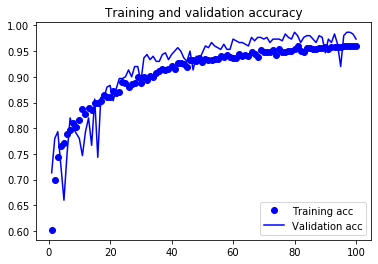

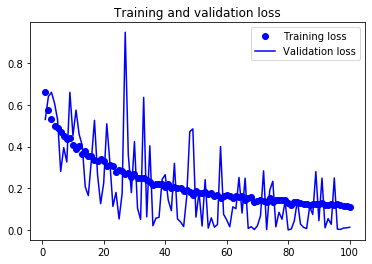

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:

model.save("Using augmented_beauty_model.h5")